In [1]:
import sys
print('Python: {}'.format(sys.version))
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math

Python: 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]


In [0]:
#Reading IRIS Dataset in Pandas Dataframe
#url="https://drive.google.com/open?id=1ugMmBeWB2r1XvDoZkdcFyFvcXp3aZ3js"
engine='python'
#link="/content/drive/My Drive/Colab Notebooks/input/Iris.csv"
link="/content/Iris.csv"
dataset = pandas.read_csv(link)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#Printing DataFrame -only first 20 rows to understand what data look like
print(dataset.head(5))
row = dataset.loc[dataset['Id']==1]
arr = np.array([1,3,4,5])
print(dataset.shape)
#Data have 5 Columns ,First four are features and fifth is Classfication of the Iris type

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


In [0]:
#findout unique classification/type of iris flower.
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
#findout no of rows for each Species.
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [5]:
#Create 3 DataFrame for each Species
setosa=dataset[dataset['Species']=='Iris-setosa']
versicolor =dataset[dataset['Species']=='Iris-versicolor']
virginica =dataset[dataset['Species']=='Iris-virginica']

print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000       4.900000   

In [6]:
print(dataset.describe())
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<Figure size 432x288 with 0 Axes>

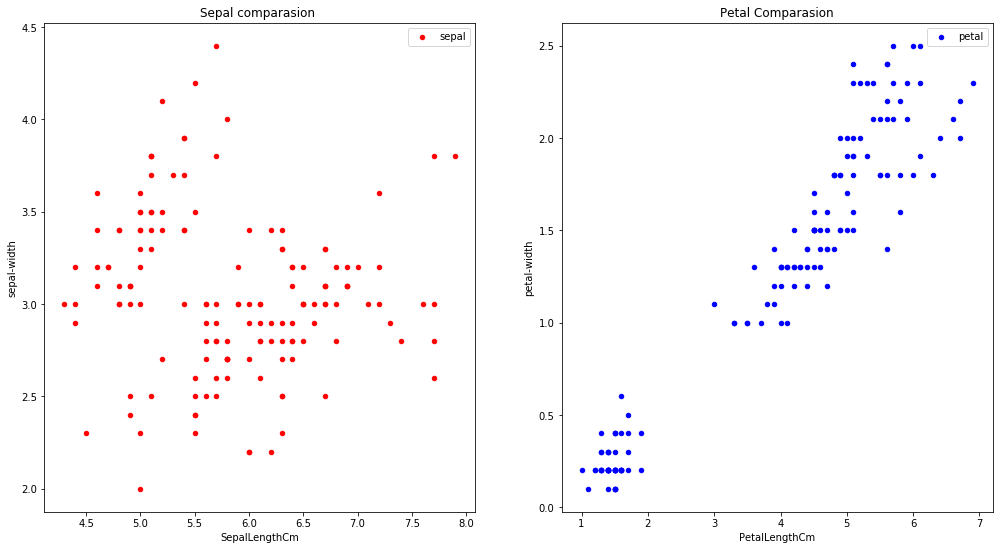

In [7]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
#warnings.simplefilter("ignore")#Supress any warning
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
dataset.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
dataset.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
 #plt.show()
 #plt.close()

# we can see that  there are some petals which are smaller than rest of petal.
#Let's examine them

In [0]:
from collections import Counter
import math

def euclidean_distance(point1, point2):
  sum = 0.0
  ###print(point1[0])
  for i in range(len(point1)):
    sum += math.pow(point1[i] - point2[i], 2)

  return math.sqrt(sum)  

def mean(labels):
  return sum(labels)/len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [0]:
def knn(data, query, k, distance_fn, choice_fn):
  neighbor_dist_and_indices = []
  
  for i, exm in enumerate(data):
    #print(exm)
    dist =  distance_fn(exm[1:], query)
    neighbor_dist_and_indices.append((dist, i))

  sorted_dist = sorted(neighbor_dist_and_indices)
  k_nearest_dist = sorted_dist[:k]

  k_nearest_labels = [data[i][0] for dist, i in k_nearest_dist]
  
  return k_nearest_dist, choice_fn(k_nearest_labels)



In [30]:
#prediction by PetalLengthCm:
reg_query = [4.95]
reg_k_nearest_neighbors, reg_prediction = knn(
    dataset[['Species','PetalLengthCm']].values, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
)
print(reg_k_nearest_neighbors)
print('Prediction: '+ str(reg_prediction))
set = dataset[['Species','PetalLengthCm']].values

t = [set[i][0] for dist, i in reg_k_nearest_neighbors]


[(0.04999999999999982, 52), (0.04999999999999982, 72), (0.04999999999999982, 77)]
Prediction: Iris-versicolor


In [26]:
#SVM
#Import scikit-learn dataset library
from sklearn import datasets
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Import train_test_split function
from sklearn.model_selection import train_test_split

label_encode = le.fit_transform(dataset['Species'])
print(label_encode)
print(dataset.columns)
ds_data = [dataset['SepalLengthCm'], dataset['SepalWidthCm'], dataset['PetalLengthCm'], dataset['PetalWidthCm']]
ds_data = np.transpose(ds_data)
X_train, X_test, y_train, y_test = train_test_split(ds_data, label_encode, test_size=0.3,random_state=109) # 70% training and 30% test

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [35]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(type(y_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<class 'numpy.ndarray'>
Accuracy: 0.9555555555555556


<Figure size 432x288 with 0 Axes>

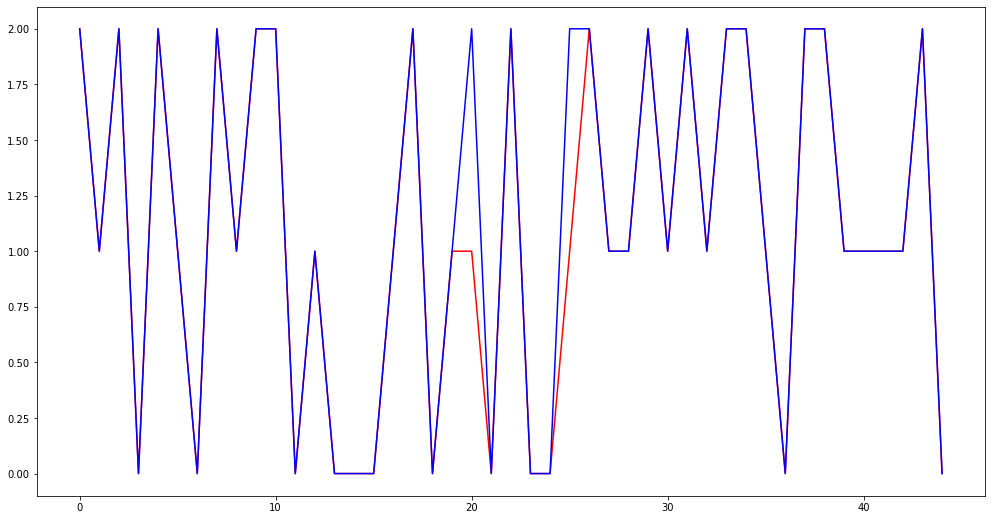

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
#fig, ax = plt.plot(1, size=(17, 9))
fig,ax=plt.subplots(1, 1,figsize=(17, 9))
#dataset.plot(x='SepalLengthCm' , y='SepalWidthCm',kind="scatter",ax=ax,sharex=False,sharey=False,label="",color='r')
plt.plot(y_test, color='r')
plt.plot(y_pred, color='b')